In [58]:
import numpy as np
from scipy.sparse import csr_matrix
import scipy.sparse

def f(x):
    if x <= 0.5:
        return 1/4
    else:
        return -1/4
    
def build_A(N):
    rows   = [*range(0,N), *range(0,N)    , *range(1,N), 0 ]
    columns= [*range(0,N), *range(1,N), 0 , *range(0,N)    ]
    data   = np.concatenate(((2 * np.ones(N)), (-1 * np.ones(2*N))))

    # Create the CSR matrix
    # print(rows)
    # print(columns)
    # print(data)
    A = csr_matrix((data, (rows, columns)), shape=(N, N))

    # print(A.toarray())

    return A + (1e-3)*np.eye(N)

def solve_poisson(N):
    x = np.linspace(0, 1, N)
    dx = 1/N
    print(dx)

    A = build_A(N)
    f_val = np.array([f(y) for y in x]) 
    F = dx**2 * f_val
    print(f_val)
    # print(F)

    # return np.invert(A) * F
    return scipy.sparse.linalg.spsolve(A, f_val)




In [59]:
import matplotlib.pyplot as plt

def plot_solution(cl_sol):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cl_sol, label='classical', color='black', linestyle='dashed')
    ax.legend()
    ax.set_xlabel('Node number')
    ax.set_ylabel('Components of solution')

    cnorm = np.linalg.norm(cl_sol)

    ax.text(0.55, 0.55, 'Norm (classical) = %.1f'%(cnorm), transform=ax.transAxes)
    
    return fig, ax

u = solve_poisson(16)
print(u)


0.0625
[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.25 -0.25 -0.25 -0.25
 -0.25 -0.25 -0.25 -0.25]
[ 0.49726763  1.24230017  1.73857501  1.98658842  1.98658842  1.73857501
  1.24230017  0.49726763 -0.49726763 -1.24230017 -1.73857501 -1.98658842
 -1.98658842 -1.73857501 -1.24230017 -0.49726763]


c:\Users\jlvmi\OneDrive\University of Michigan\Academics\12. Fall 2023\QC Research\Examples\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Node number', ylabel='Components of solution'>)

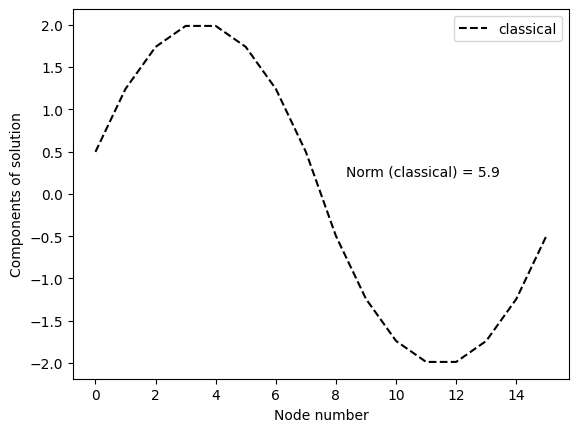

In [60]:
plot_solution(u)

In [61]:
## 2D Poisson equation solver
def build_A_dirichilet(N):
    A = build_A(N)
    A[N-1, 0] = 0
    A[0, N-1] = 0
    return A

def build_A_2D(N):
    A = build_A_dirichilet(N)
    return np.kron(A, np.eye(N)) + np.kron(np.eye(N), A)

In [68]:
def global2grid(cl_sol):
    N = len(cl_sol)
    n = int(np.sqrt(N))
    F = np.zeros((n,n))

    for i in range(N):
        xi = int(np.floor(i/n))
        yi = int(i % n)
        F[xi,yi] = cl_sol[i]

    return F

def plot_solution_2D(cl_sol, N):

    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)

    x, y = np.meshgrid(x, y) 
  
    F = global2grid(cl_sol)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(x, y, F) 
    
    return fig, ax

def solve_poisson2D(N):
    x = np.linspace(0, N-1, N)
    y = np.linspace(0, N-1, N)
    dx = N/N
    dy = N/N
    print(dx)

    
    A = build_A_2D(N)
    f_val = np.zeros(N*N)

    # f_val_1D = np.array([f(y) for y in x]) 
    # f_val_1D = np.array([-1 for y in x]) 
    # f_val = np.kron(f_val_1D, f_val_1D)
    for ix in range(N):
        for iy in range(N):
            index = 4*ix + iy
            if index < N*N/2:
                f_val[index] = -0.25
            else:
                f_val[index] = 0.25 

    print(f_val)
    

    # F = dx**2 * f_val
    plot_solution_2D(f_val, N)
    print(f_val)

    # return np.invert(A) * F
    return np.linalg.solve(A, f_val)

1.0
[-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25]
[-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25]
[-0.13054019 -0.17024663 -0.17024663 -0.13054019 -0.10217521 -0.13054019
 -0.13054019 -0.10217521  0.10217521  0.13054019  0.13054019  0.10217521
  0.13054019  0.17024663  0.17024663  0.13054019]


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

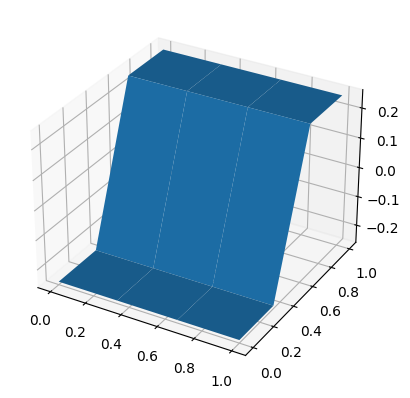

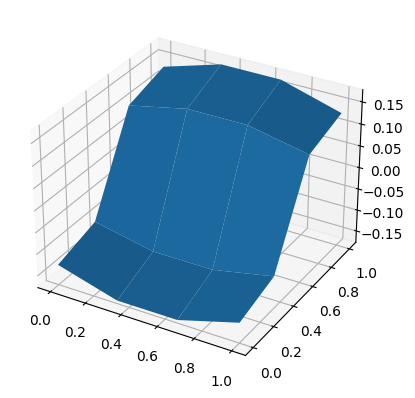

In [72]:
N = 4
cl = solve_poisson2D(N)
print(cl)
plot_solution_2D(cl, N)